In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

Loading data

In [2]:
data = pd.read_csv('../data/mergedleagues.csv')

In [3]:
data = data.loc[5423:,]

In [4]:
data

,Date,Home,xG_Home,xG_Away,Away,Referee,xGA_Home,xGA_Away,Home_Fatigue,Away_Fatigue,Temp,Humidity,Wind,Referee_Bias,G_Home,G_Away,Result
5423,28-05-2023 16:30,Real Madrid,1.4,2.5,Celta Vigo,Juan Martínez Munuera,0.2,1.5,Low,Low,Low,High,Low,Home,2,1,Home
5424,10-08-2018 20:00,Nantes,0.8,0.8,Salernitana,Maurizio Mariani,0.6,0.8,Low,Moderate,Moderate,High,High,Away,1,2,Away
5425,11-08-2018 12:30,Reims,0.8,0.7,Verona,Maurizio Mariani,0.5,0.6,Low,Low,Low,High,Low,Home,2,0,Home
5426,11-08-2018 15:00,Lille,2.7,0.5,Inter Milan,Maurizio Mariani,1.5,0.4,Low,Moderate,High,Low,Low,Home,4,2,Home
5427,11-08-2018 15:00,Strasbourg,0.4,1.0,AC Milan,Maurizio Mariani,0.4,0.2,Low,High,Moderate,High,Moderate,Home,0,1,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7281,28-05-2023 16:30,Nice,1.7,2.7,Atalanta,Daniele Orsato,0.4,2.1,Low,Low,Moderate,Moderate,Low,Away,2,5,Away
7282,28-05-2023 16:30,Monaco,3.5,0.4,Torino,Paolo Valeri,1.7,0.5,Low,High,Low,High,Low,Away,1,0,Home
7283,28-05-2023 16:30,Reims,1.4,0.7,Atalanta,Fabio Maresca,1.2,0.6,Moderate,Low,Low,High,High,Away,0,1,Away
7284,28-05-2023 16:30,Lens,2.3,0.2,Bologna,Marco Guida,0.6,0.1,Moderate,High,Moderate,High,Low,Home,1,1,Draw


Datatypes of dataset columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 5423 to 7285
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1863 non-null   object 
 1   Home          1863 non-null   object 
 2   xG_Home       1863 non-null   float64
 3   xG_Away       1863 non-null   float64
 4   Away          1863 non-null   object 
 5   Referee       1863 non-null   object 
 6   xGA_Home      1863 non-null   float64
 7   xGA_Away      1863 non-null   float64
 8   Home_Fatigue  1863 non-null   object 
 9   Away_Fatigue  1863 non-null   object 
 10  Temp          1863 non-null   object 
 11  Humidity      1863 non-null   object 
 12  Wind          1863 non-null   object 
 13  Referee_Bias  1863 non-null   object 
 14  G_Home        1863 non-null   int64  
 15  G_Away        1863 non-null   int64  
 16  Result        1863 non-null   object 
dtypes: float64(4), int64(2), object(11)
memory usage: 247.6+ KB


In [6]:
data.describe()

,xG_Home,xG_Away,xGA_Home,xGA_Away,G_Home,G_Away
count,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,1.460440,1.257756,1.034729,0.890016,1.491680,1.263553
std,0.798177,0.780008,0.640263,0.633954,1.329986,1.236223
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.700000,0.600000,0.400000,0.000000,0.000000
50%,1.400000,1.100000,0.900000,0.800000,1.000000,1.000000
75%,1.900000,1.700000,1.400000,1.200000,2.000000,2.000000
max,5.200000,4.600000,4.200000,4.400000,9.000000,9.000000


Finding any null values

In [7]:
data.isna().sum()

Date            0
Home            0
xG_Home         0
xG_Away         0
Away            0
Referee         0
xGA_Home        0
xGA_Away        0
Home_Fatigue    0
Away_Fatigue    0
Temp            0
Humidity        0
Wind            0
Referee_Bias    0
G_Home          0
G_Away          0
Result          0
dtype: int64

Bar Plot for Expected Goals vs Actual Goals of Top 10 Home Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

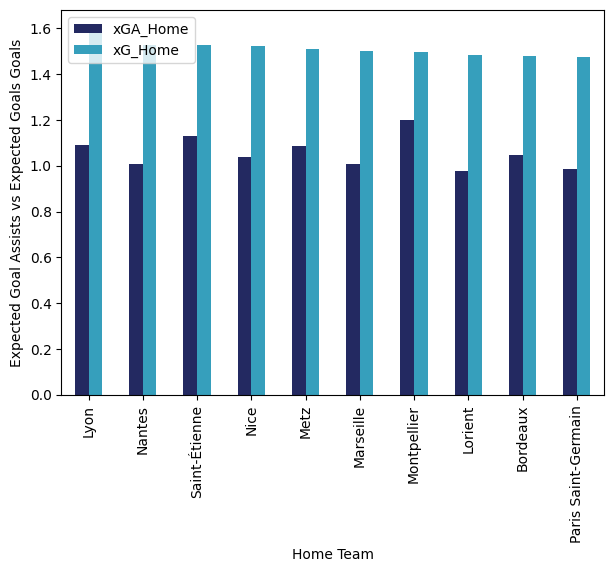

In [8]:
home_team = data.groupby('Home')[['xGA_Home','xG_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(10).plot(kind='bar', x='Home', y=['xGA_Home','xG_Home'], figsize=(7,5), color=['#232961','#369fbc'])
plt.xlabel('Home Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Bar Plot for Expected Goals vs Actual Goals of Top 10 Away Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

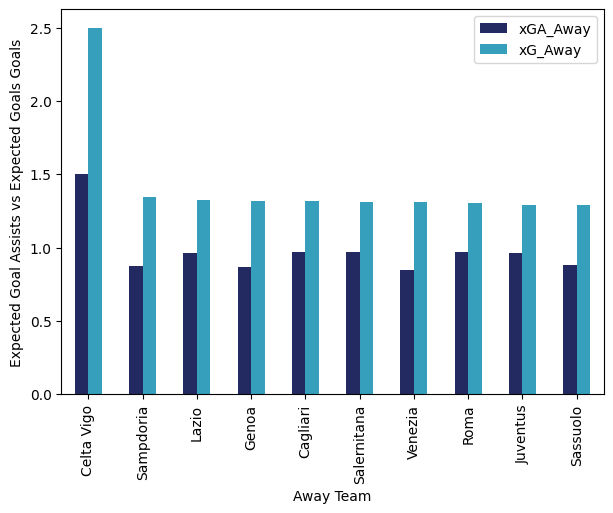

In [9]:

Away_team = data.groupby('Away')[['xGA_Away','xG_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(10).plot(kind='bar', x='Away', y=['xGA_Away','xG_Away'], figsize=(7,5),color=['#232961','#369fbc'])
plt.xlabel('Away Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Scatter plot for Expected Assisted Goals vs Expected Goals of Home Teams

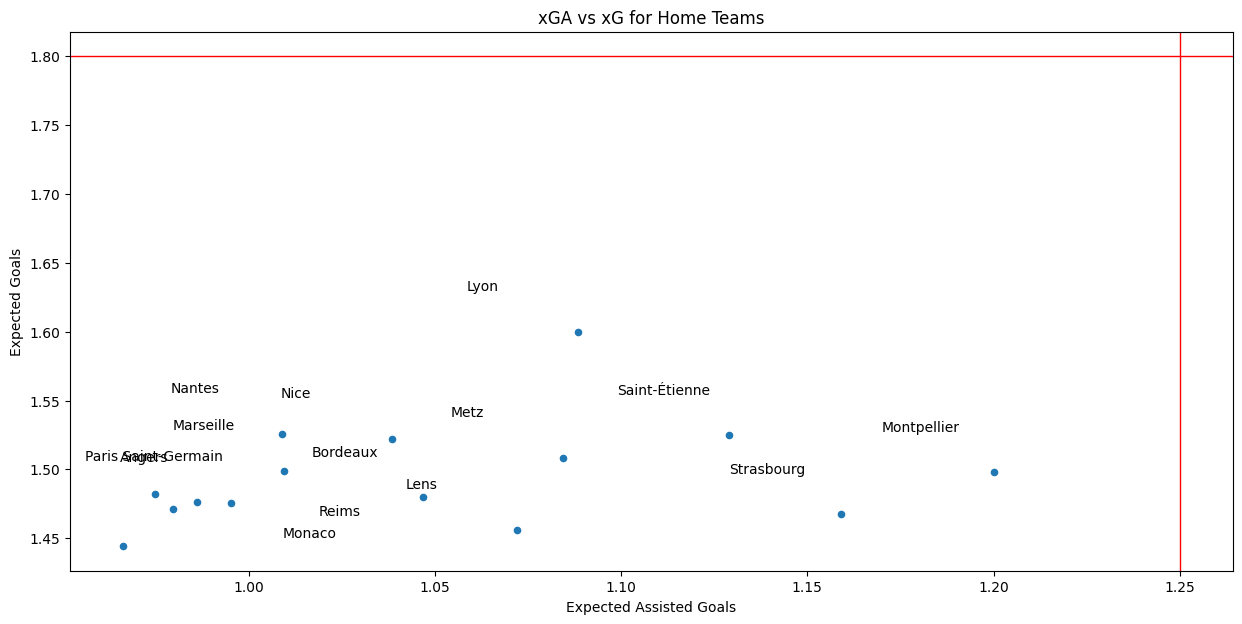

In [10]:


home_team = data.groupby('Home')[['xG_Home','xGA_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(15).plot(kind='scatter', x='xGA_Home', y='xG_Home', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Home Teams')
plt.axhline(y=1.8, color='r', linewidth=1)
plt.axvline(x=1.25, color='r', linewidth=1)

for i, txt in enumerate(home_team['Home']):
    plt.annotate(txt, (home_team['xGA_Home'][i] - 0.03, home_team['xG_Home'][i] + 0.03))




Scatter plot for Expected Assisted Goals vs Expected Goals of Away Teams

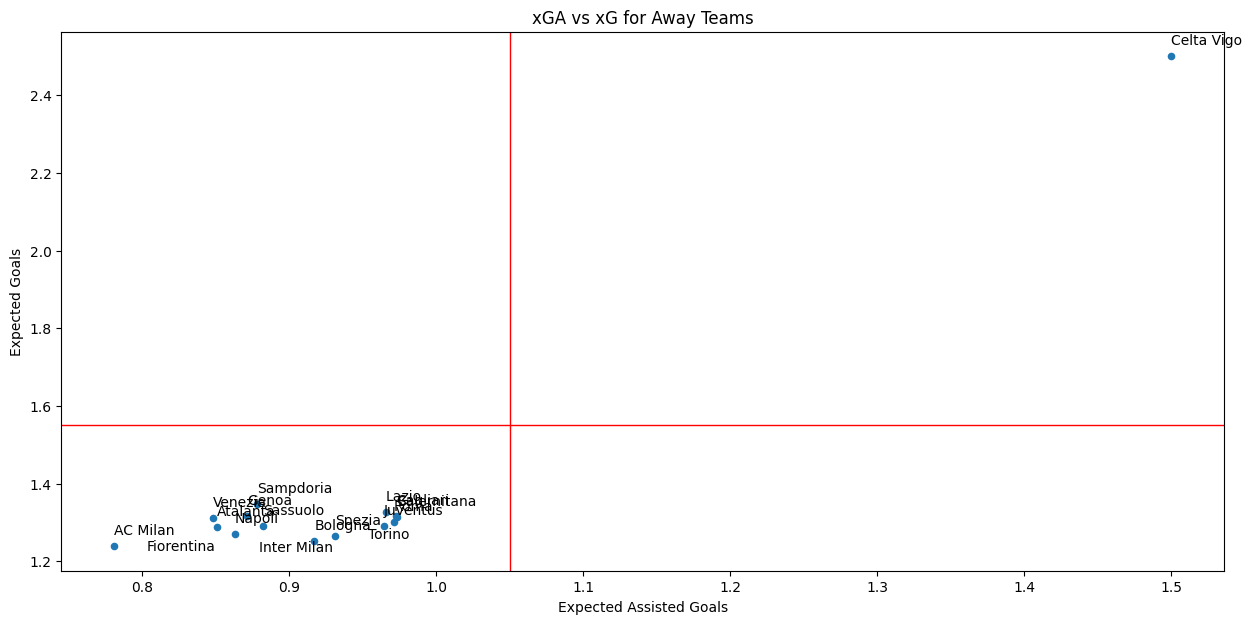

In [11]:

Away_team = data.groupby('Away')[['xG_Away','xGA_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(15).plot(kind='scatter', x='xGA_Away', y='xG_Away', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Away Teams')
plt.axhline(y=1.55, color='r', linewidth=1)
plt.axvline(x=1.05, color='r', linewidth=1)


for i, txt in enumerate(Away_team['Away']):
    plt.annotate(txt, (Away_team['xGA_Away'][i], Away_team['xG_Away'][i] + 0.03))

Pie chart for referee bias value count

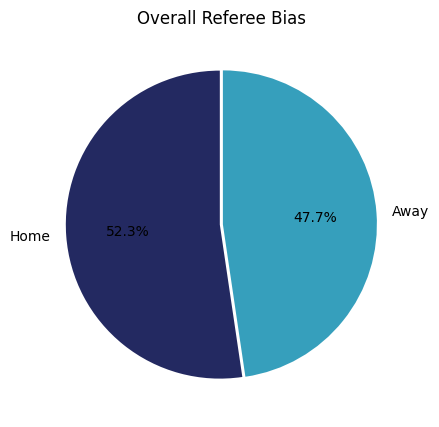

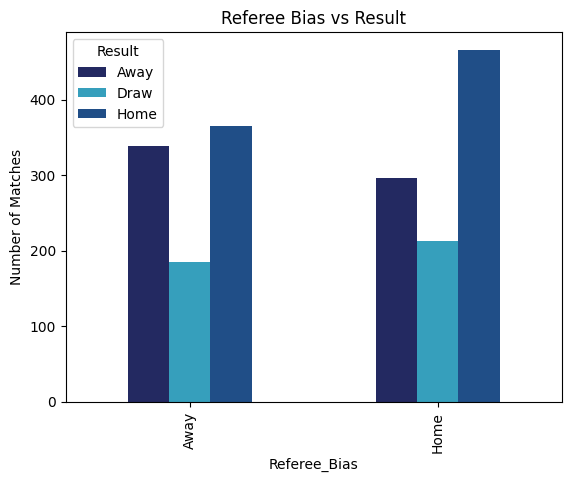

In [12]:

plt.figure(figsize=(10,5))
plt.pie(data['Referee_Bias'].value_counts(), labels=['Home','Away'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc'],explode=[0.01, 0.01])
plt.title('Overall Referee Bias')
crosstab = pd.crosstab(data['Referee_Bias'],data['Result'])
crosstab.plot.bar(color = ['#232961','#369fbc','#204e87'])
plt.title('Referee Bias vs Result')
plt.ylabel('Number of Matches')
plt.show()

Pie chart for home fatigue and away fatigue value count 

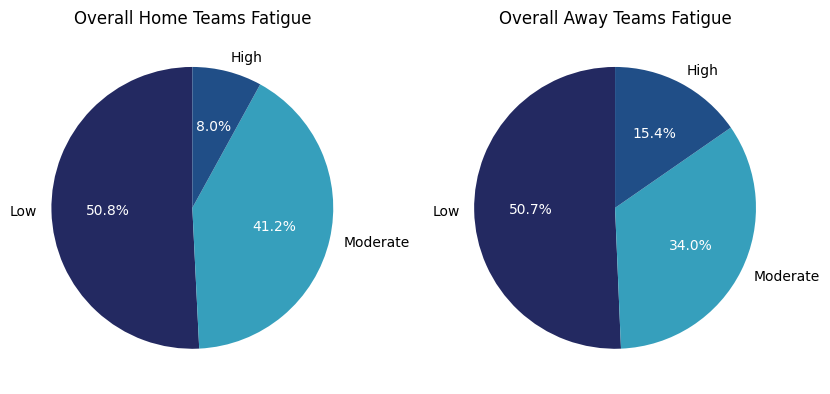

In [13]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
patches, texts, autotexts = plt.pie(data['Home_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%',startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Home Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.subplot(1,2,2)
patches, texts, autotexts = plt.pie(data['Away_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Away Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.show()



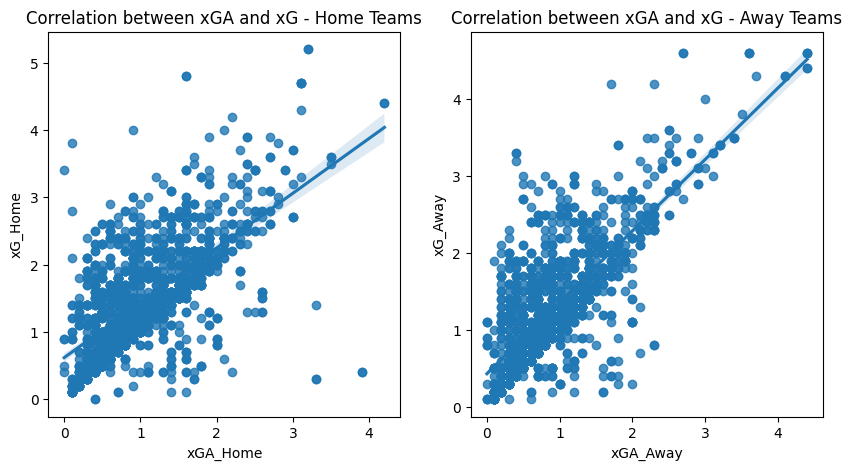

          xGA_Home   xG_Home
xGA_Home  1.000000  0.653262
xG_Home   0.653262  1.000000
          xGA_Away   xG_Away
xGA_Away  1.000000  0.754572
xG_Away   0.754572  1.000000


In [14]:
#correlation between expected home goals and actual home goals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x='xGA_Home', y='xG_Home', data=data)
plt.title('Correlation between xGA and xG - Home Teams')
plt.subplot(1,2,2)
sns.regplot(x='xGA_Away', y='xG_Away', data=data)
plt.title('Correlation between xGA and xG - Away Teams')
plt.show()

#correlation coeffieient between expected home goals and expected home goals
correlation1 = data[['xGA_Home','xG_Home']].corr()
print(correlation1)

#correlation coeffieient between expected away goals and actual away goals
correlation2 = data[['xGA_Away','xG_Away']].corr()
print(correlation2)

In [15]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Temp", y="xG_Away", hue="Temp" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Temp", y="xG_Home", hue="Temp" ,data=data)
# plt.show()




In [16]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Humidity", y="xG_Away", hue="Humidity" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Humidity", y="xG_Home", hue="Humidity" ,data=data)
# plt.show()




In [17]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Wind", y="xG_Away", hue="Wind" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Wind", y="xG_Home", hue="Wind" ,data=data)
# plt.show()




In [18]:



# # Subplot for xG_Home
# fig, axes = plt.subplots(2, 1,figsize=(12, 8))
# sns.pointplot(x='Referee_Bias', y='xG_Home', data=data,  ci='sd', ax=axes[0])
# # plt.title('xG_Home by Referee_Bias')
# # plt.xlabel('Referee_Bias')
# # plt.ylabel('xG_Home')

# # Subplot for xG_Away
# sns.pointplot(x='Referee_Bias', y='xGA_Home', data=data,  ci='sd', ax=axes[1])
# # plt.title('xG_Away by Result')
# # plt.xlabel('Result')
# # plt.ylabel('xG_Away')

# # sns.pointplot(x='Result', y='xGA_Away', data=data,  ci='sd', ax=axes[1,0])
# # # plt.title('xGA_Away by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Away')


# # sns.pointplot(x='Result', y='xGA_Home', data=data,  ci='sd', ax=axes[1,1])
# # # plt.title('xGA_Home by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Home')




In [19]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data
num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:
        model = ols(f'{home_level} ~ Referee_Bias', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Referee_Bias']
        p_value = anova_results['PR(>F)']['Referee_Bias']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\4001309981.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,12.343820,0.000453,0.006589
0,xG_Away,0.095130,0.757788,0.000051
0,xGA_Home,8.533599,0.003528,0.004565
0,xGA_Away,0.008573,0.926241,0.000005


In [20]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Home_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Home_Fatigue']
        p_value = anova_results['PR(>F)']['Home_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2796385453.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,1.706553,0.181774,0.001832
0,xG_Away,0.602673,0.547454,0.000648
0,xGA_Home,0.055617,0.945902,0.000060
0,xGA_Away,2.233634,0.107426,0.002396


In [21]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Away_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Away_Fatigue']
        p_value = anova_results['PR(>F)']['Away_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2577399383.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])


,Variable,F-Statistic,P-Value,eta
0,xG_Home,3.518634,0.029837,0.003769
0,xG_Away,2.742581,0.064664,0.002940
0,xGA_Home,1.165182,0.312093,0.001251
0,xGA_Away,3.886929,0.020675,0.004162


In [22]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Temp', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Temp']
        p_value = anova_results['PR(>F)']['Temp']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3831054091.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be t

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.525261,0.591489,0.000564
0,xG_Away,2.032248,0.131332,0.002180
0,xGA_Home,0.565429,0.568214,0.000608
0,xGA_Away,3.112309,0.044730,0.003335


In [23]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Humidity', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Humidity']
        p_value = anova_results['PR(>F)']['Humidity']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1208712932.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,2.650547,0.070879,0.002842
0,xG_Away,2.722779,0.065954,0.002919
0,xGA_Home,1.200794,0.301188,0.001290
0,xGA_Away,2.258332,0.104811,0.002422


In [24]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Wind', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Wind']
        p_value = anova_results['PR(>F)']['Wind']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1808189195.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys w

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.169142,0.844402,0.000182
0,xG_Away,1.137531,0.320833,0.001222
0,xGA_Home,0.053167,0.948223,0.000057
0,xGA_Away,2.468876,0.084957,0.002648


In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Referee_Bias']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Referee Bias.")
else:
    print("There is no significant association between Football Result and Referee Bias.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Referee_Bias                  
Away           338   185   365
Home           296   213   466


Chi-square statistic: 12.99328886501583
P-value: 0.0015084925583725073

Significance Test:
There is a significant association between Football Result and Referee Bias.


Result        Away  Draw  Home
Home_Fatigue                  
High            35    35    79
Low            334   192   420
Moderate       265   171   332


Chi-square statistic: 9.181088353941007
P-value: 0.05672912417483459

Significance Test:
There is no significant association between Football Result and Home_Fatigue.


<Axes: xlabel='Home_Fatigue'>

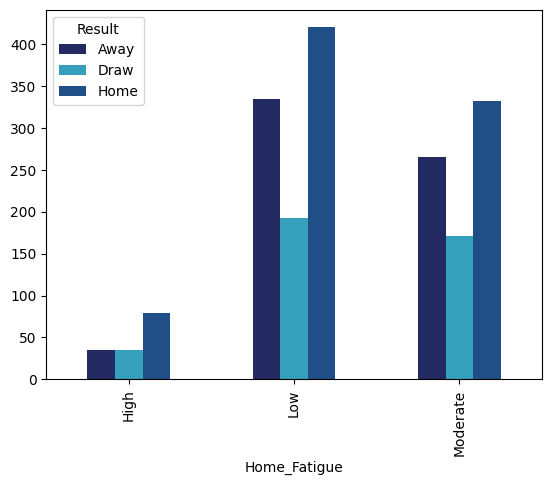

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Home_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Home_Fatigue.")
else:
    print("There is no significant association between Football Result and Home_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Away_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Away_Fatigue.")
else:
    print("There is no significant association between Football Result and Away_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Away_Fatigue                  
High            84    53   149
Low            225   148   260
Moderate       325   197   422


Chi-square statistic: 10.053946806301127
P-value: 0.039528693952913196

Significance Test:
There is a significant association between Football Result and Away_Fatigue.


In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Temp']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Temperature.")
else:
    print("There is no significant association between Football Result and Temperature.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Temp                      
High        12     5     9
Low        235   178   352
Moderate   387   215   470


Chi-square statistic: 8.211350287110651
P-value: 0.08413585633893561

Significance Test:
There is no significant association between Football Result and Temperature.


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Humidity']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Humidity.")
else:
    print("There is no significant association between Football Result and Humidity.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Humidity                  
High       360   227   483
Low         26    15    23
Moderate   248   156   325


Chi-square statistic: 2.151673612987972
P-value: 0.7078858310512133

Significance Test:
There is no significant association between Football Result and Humidity.


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Wind']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Wind.")
else:
    print("There is no significant association between Football Result and Wind.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Wind                      
High        48    28    39
Low        318   221   405
Moderate   268   149   387


Chi-square statistic: 13.31009485313547
P-value: 0.009855927757910539

Significance Test:
There is a significant association between Football Result and Wind.


In [31]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest


df = data


fatigue_levels = ["Low", "Moderate", "High"]

z_test_results = pd.DataFrame(columns=['Home_Fatigue','Away_Fatigue','Z-Statistic', 'P-Value','Significant Difference'])

for home_level in fatigue_levels:
    for away_level in fatigue_levels:

        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]


        z_stat, p_value = ztest(home_data, away_data)
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        
        new_row = pd.DataFrame([{'Home_Fatigue':home_level,'Away_Fatigue':away_level,'Z-Statistic': z_stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        z_test_results = pd.concat([z_test_results, new_row])

z_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3194791706.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_test_results = pd.concat([z_test_results, new_row])


,Home_Fatigue,Away_Fatigue,Z-Statistic,P-Value,Significant Difference
0,Low,Low,5.468057,4.549945e-08,Yes
0,Low,Moderate,3.571257,3.552721e-04,Yes
0,Low,High,4.126945,3.676145e-05,Yes
0,Moderate,Low,6.546860,5.875923e-11,Yes
0,Moderate,Moderate,4.947566,7.514740e-07,Yes
0,Moderate,High,4.936798,7.941580e-07,Yes
0,High,Low,4.026616,5.658536e-05,Yes
0,High,Moderate,2.816334,4.857511e-03,Yes
0,High,High,3.407977,6.544651e-04,Yes


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3520716755.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   352977.0  1.555037e-09   
1          Low     Moderate  Mann-Whitney U Test   499014.5  9.428312e-06   
2          Low         High  Mann-Whitney U Test   160728.0  1.355198e-06   
3     Moderate          Low  Mann-Whitney U Test   293491.0  2.140327e-11   
4     Moderate     Moderate  Mann-Whitney U Test   416199.0  1.266909e-07   
5     Moderate         High  Mann-Whitney U Test   133762.0  4.979061e-08   
6         High          Low  Mann-Whitney U Test    55769.0  5.118258e-04   
7         High     Moderate  Mann-Whitney U Test    79546.0  9.982159e-03   
8         High         High  Mann-Whitney U Test    25533.0  6.761655e-04   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                    Yes  
7            

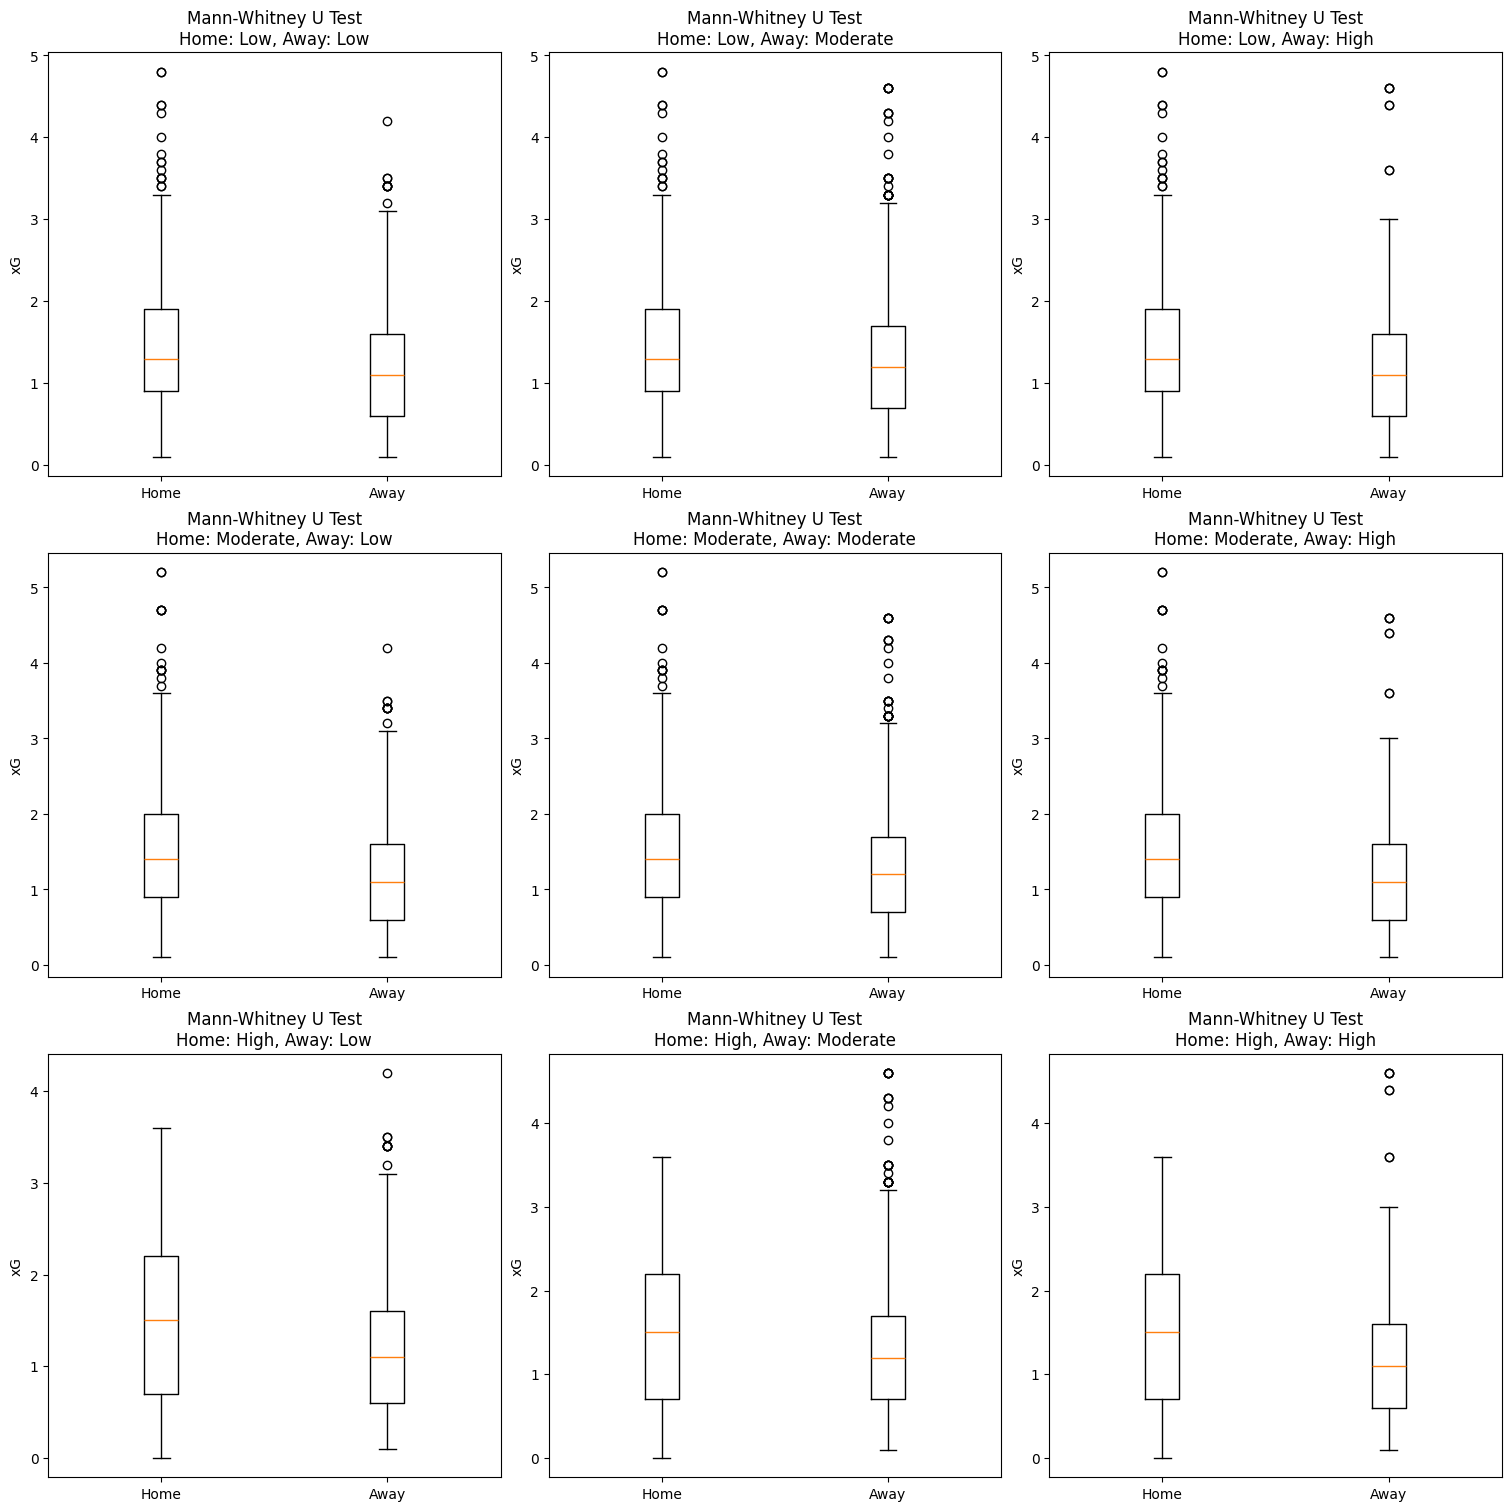

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2867954313.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, 

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   357710.0  4.760854e-11   
1          Low     Moderate  Mann-Whitney U Test   500848.5  4.475103e-06   
2          Low         High  Mann-Whitney U Test   157827.0  1.835686e-05   
3     Moderate          Low  Mann-Whitney U Test   290574.0  2.712345e-10   
4     Moderate     Moderate  Mann-Whitney U Test   405727.0  2.075534e-05   
5     Moderate         High  Mann-Whitney U Test   128091.0  3.132720e-05   
6         High          Low  Mann-Whitney U Test    55286.5  1.025836e-03   
7         High     Moderate  Mann-Whitney U Test    77740.0  3.812563e-02   
8         High         High  Mann-Whitney U Test    24444.5  1.154499e-02   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                    Yes  
7            

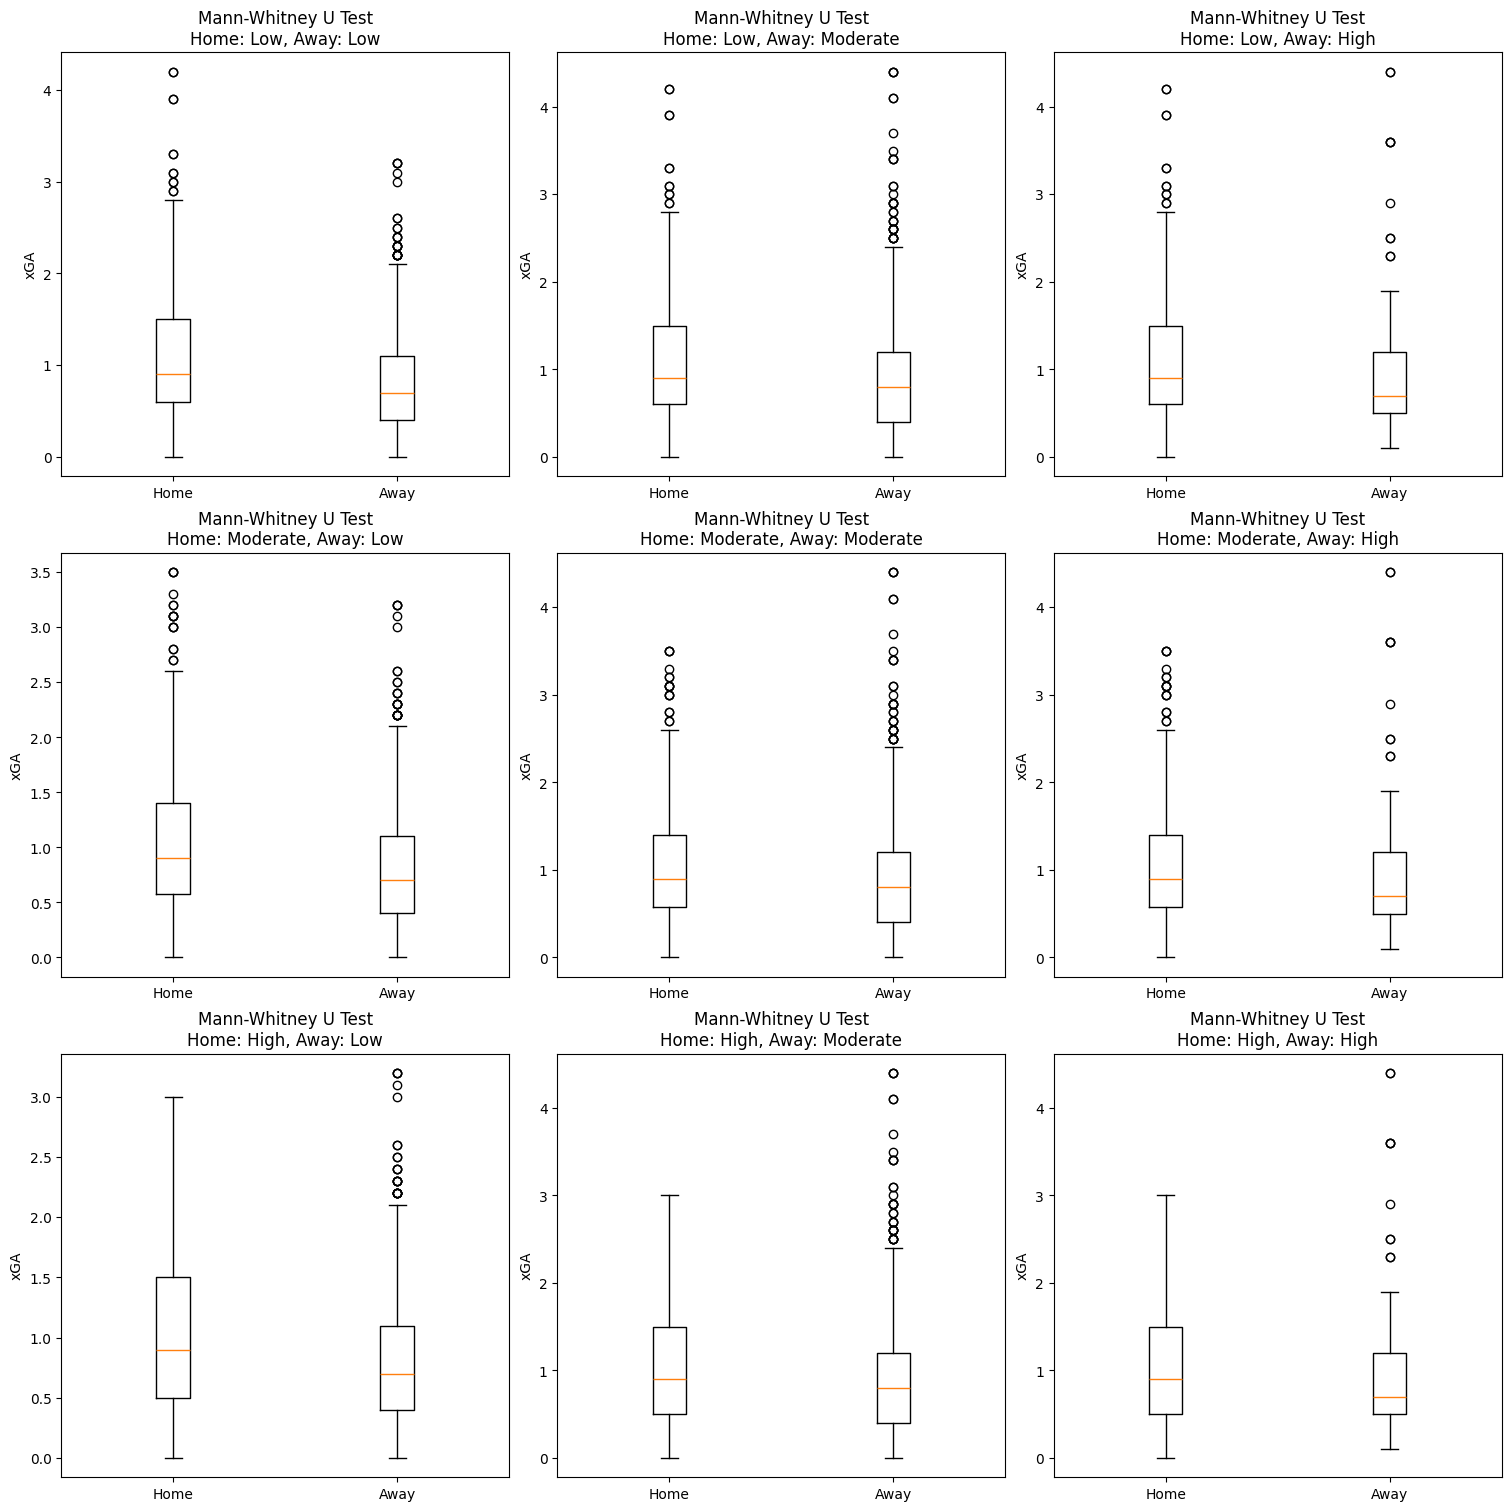

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt



fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xGA_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xGA_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3113352540.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type      Statistic       P-Value  \
0      NaN  Mann-Whitney U Test  353253.000000  2.060792e-12   
1      NaN  Mann-Whitney U Test  638590.500000  7.713327e-06   
2      NaN               Z-Test       0.753236  4.513080e-01   

  Significant Difference      Temp  
0                    Yes       Low  
1                    Yes  Moderate  
2                     No      High  


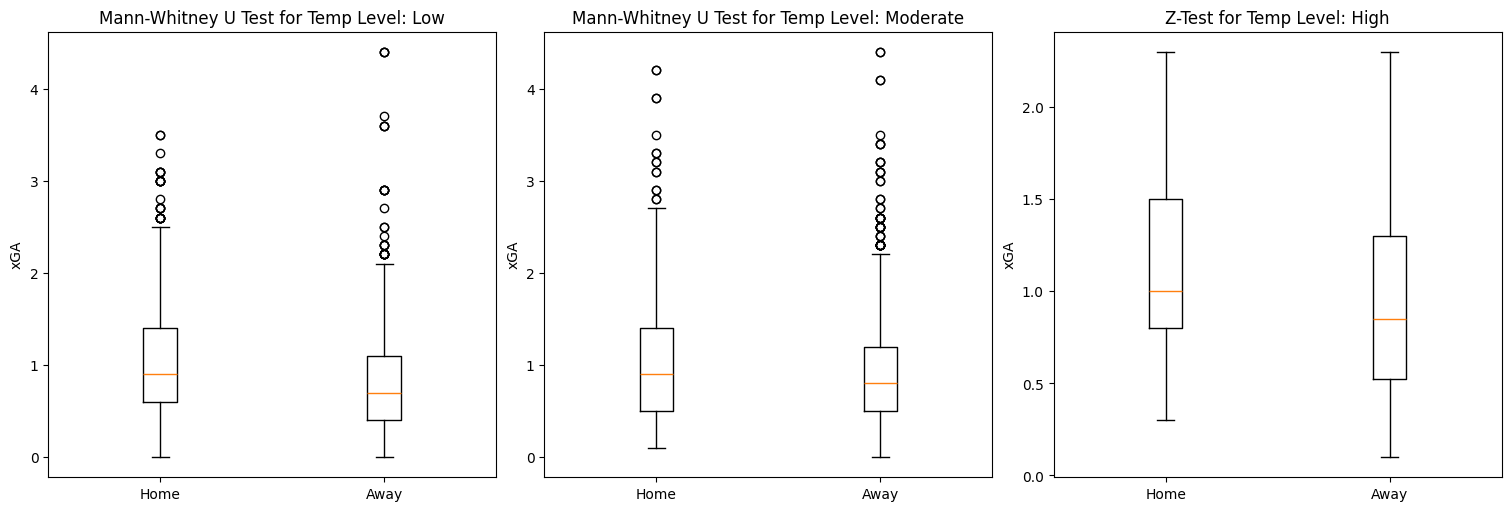

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Temp"] == home_level]["xGA_Home"]
    away_data = df[df["Temp"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Temp': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Temp Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2281937181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic       P-Value  \
0       Low  Mann-Whitney U Test     2187.5  5.070052e-01   
1  Moderate  Mann-Whitney U Test   313856.0  2.055224e-09   
2      High  Mann-Whitney U Test   661855.0  3.814398e-10   

  Significant Difference  
0                     No  
1                    Yes  
2                    Yes  


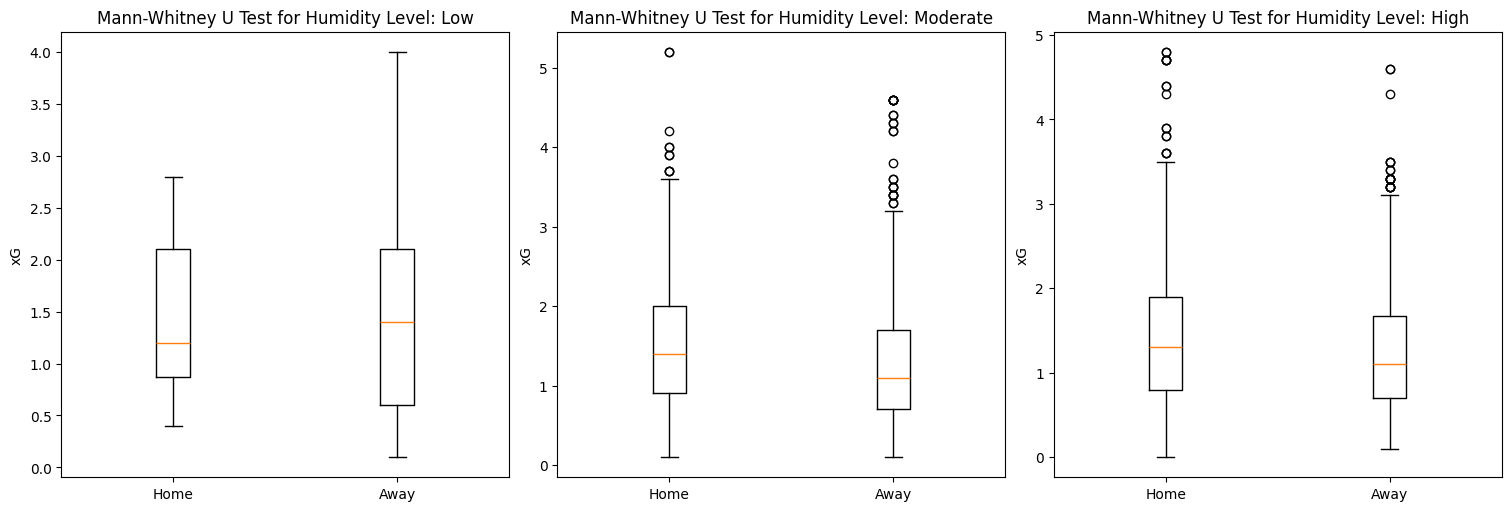

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xG_Home"]
    away_data = df[df["Humidity"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\1647458132.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic       P-Value  \
0       Low  Mann-Whitney U Test     2513.0  2.643015e-02   
1  Moderate  Mann-Whitney U Test   303161.5  3.072154e-06   
2      High  Mann-Whitney U Test   660018.5  8.369013e-10   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  


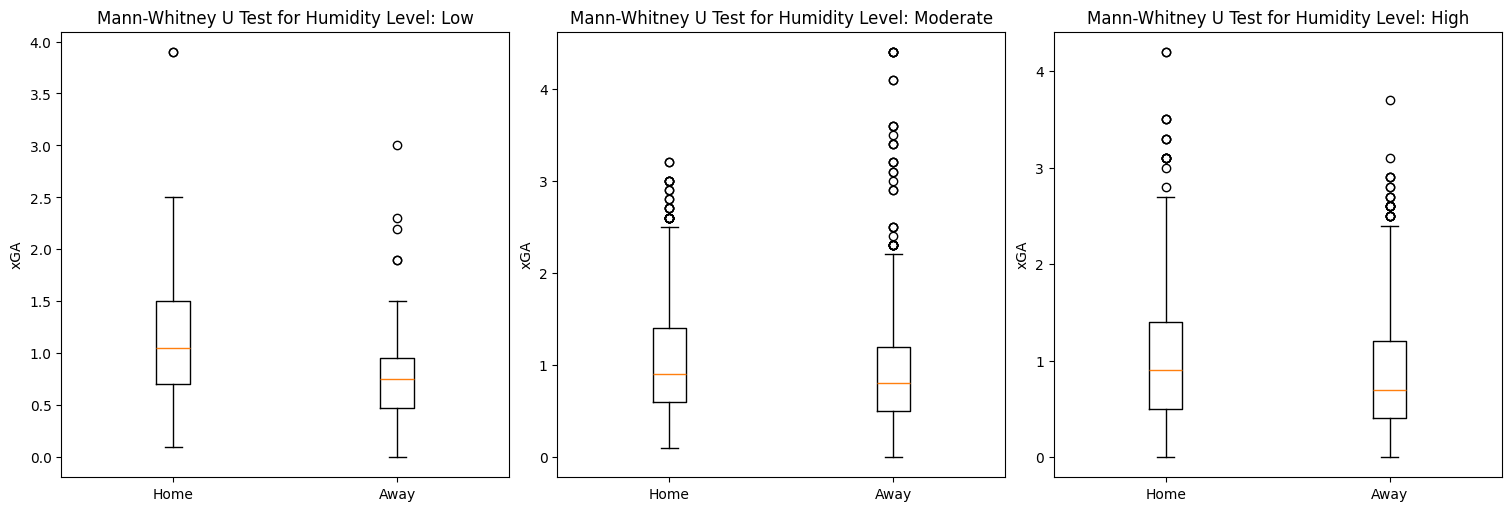

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xGA_Home"]
    away_data = df[df["Humidity"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\3640864810.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   504876.5  5.396876e-07   
1      NaN  Mann-Whitney U Test   387161.0  6.134753e-12   
2      NaN  Mann-Whitney U Test     7800.5  1.844118e-02   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


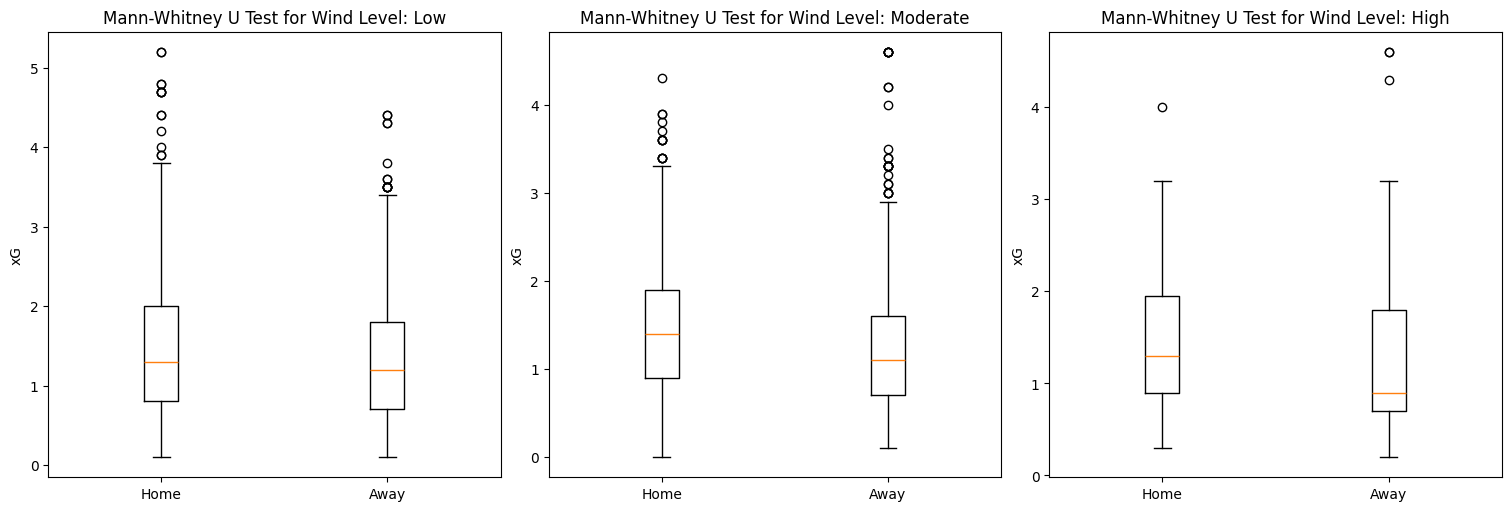

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xG_Home"]
    away_data = df[df["Wind"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_11512\2676737873.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   519464.5  4.103614e-10   
1      NaN  Mann-Whitney U Test   369607.5  5.955770e-07   
2      NaN  Mann-Whitney U Test     7132.0  3.026180e-01   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                     No      High  


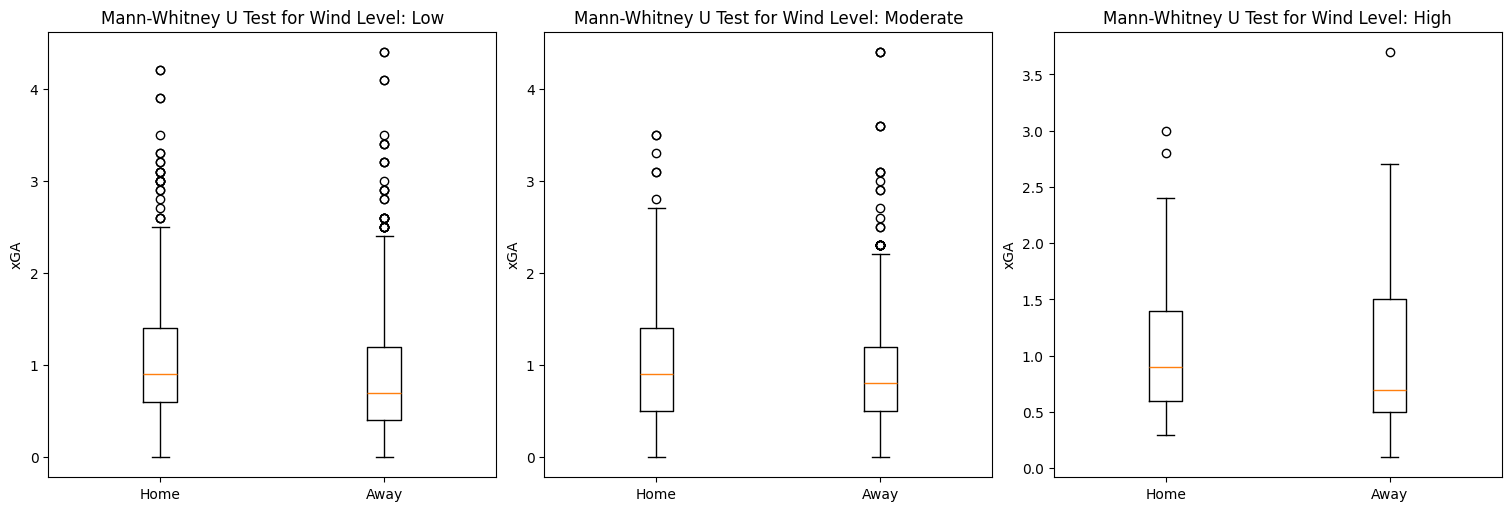

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xGA_Home"]
    away_data = df[df["Wind"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()
